# Lead Conversion Success with Logistic Regression

## Introduction

In the fiercely competitive landscape of online education, the ability to convert leads into paying customers is a game-changer. X Education, a key player in the industry, faces a challenge – despite a steady influx of leads, their conversion rate remains below par. In this blog, we embark on a journey to build a logistic regression model that assigns lead scores, revolutionizing the way X Education identifies and pursues potential customers.

## Problem Statement

X Education aims to boost its lead conversion rate from 30% to an ambitious 80%. The objective is to construct a model capable of assigning lead scores between 0 and 100, empowering the sales team to prioritize interactions with high-potential leads.

## Dataset Overview

- **Size:** 9000 data points
- **Attributes:** Various, including Lead Source, Total Time Spent on Website, Total Visits, and Last Activity.
- **Target Variable:** 'Converted' (1 for conversion, 0 for non-conversion)
- **Challenge:** Handling 'Select' level in categorical variables.

## Goals

1. **Logistic Regression Model:** Develop a model for lead scoring.
2. **Adaptability:** Address future company requirements, solving specific problems outlined.
3. **Documentation and Presentation:** Deliver a comprehensive Jupyter notebook, a Word document answering company queries, and a concise presentation summarizing the analysis.

## Analysis Approach

1. **Data Exploration and Preprocessing:** Understand and clean the dataset.
2. **Feature Engineering:** Identify influential features affecting lead conversion.
3. **Model Building:** Create a logistic regression model for lead scoring.
4. **Evaluation Metrics:** Assess model performance using relevant metrics.
5. **Adaptability to Future Changes:** Tackle additional company problems, ensuring model flexibility.

## Business Implications

By leveraging lead scores, X Education can efficiently prioritize leads. Higher scores indicate hotter leads, guiding the sales team towards more fruitful interactions. The ultimate goal is not just to achieve the 80% conversion rate but to reshape the lead conversion process for sustained growth.

## Learnings and Recommendations

1. **Data Quality Matters:** Thorough cleaning and preprocessing are paramount.
2. **Feature Selection is Key:** Choosing the right features significantly impacts predictive power.
3. **Model Adaptability:** A flexible model caters to future company needs, ensuring long-term success.

In conclusion, this journey from data exploration to model building holds crucial lessons for organizations aiming to enhance lead conversion. Armed with a robust model, X Education is poised to elevate its lead conversion game, fostering not just higher conversion rates but a roadmap for enduring success.


In [1]:
#Importing required packages
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings("ignore")

## Step1: Loading and Cleaning Data
#### Import Data

In [2]:
# Loading the data using Pandas
df= pd.read_csv("Leads.csv")

In [3]:
# Understanding Data using Head fuction to display first 5 rows 
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
# Use df.describe() to generate descriptive statistics of the DataFrame
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [5]:
# Use df.info() to display detailed information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

##  Looking at Null Values Before and after Replacing "Select" by NAN

In [6]:
# Calculate the percentage of null values for each column and sort in descending order
null_percentage = (df.isnull().sum() / df.shape[0]).sort_values(ascending=False) * 100
null_percentage

Lead Quality                                     51.590909
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Profile Index                       45.649351
Tags                                             36.287879
Lead Profile                                     29.318182
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
How did you hear about X Education               23.885281
Specialization                                   15.562771
City                                             15.367965
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

## Handling 'Select' level in categorical variables

In [7]:
# Replacing 'Select' with NaN (Since it means no option is selected)
df = df.replace('Select',np.nan)

### Drop features with high percentage of null values

In [8]:
# Checking Null Values in Descending Order
drop_columns=((df.isnull().sum() / df.shape[0]).sort_values(ascending=False) * 100)
drop_list=drop_columns[drop_columns>35].index

In [9]:
# Use df.drop() to remove columns specified in drop_list containing null values
df.drop(drop_list, axis=1, inplace=True)

### High Cardinality Categorical Variables:  
Variables with high cardinality (many unique categories) might be challenging to include directly in a logistic regression model. For example, if "Prospect ID" or "Lead Number" has a unique value for each observation, it might not provide meaningful information for predicting the target variable and can be considered for elimination.

In [10]:
# df.drop() to remove the columns "Prospect ID" and "Lead Number" from the DataFrame
df.drop(["Prospect ID", "Lead Number"], axis=1, inplace=True)


In [11]:
# Checking Percentage of remaining NUll Values
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False) * 100

What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Lead Origin                                       0.000000
Newspaper                                         0.000000
A free copy of Mastering The Interview            0.000000
I agree to pay the amount through cheque          0.000000
Get updates on DM Content                         0.000000
Update me on Supply Chain Content                 0.000000
Receive More Updates About Our Courses            0.000000
Through Recommendations                           0.000000
Digital Advertisement                             0.000000
Search                                            0.0000

In [12]:
#  Exploring Preferences: Count of Responses for Course Selection Criteria
df["What matters most to you in choosing a course"].value_counts()

What matters most to you in choosing a course
Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: count, dtype: int64

In [13]:
# Distribution of Current Occupations in the Dataset
df['What is your current occupation'].value_counts()

What is your current occupation
Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: count, dtype: int64

In [14]:
# Distribution of Leads by Country
df['Country'].value_counts()

Country
India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malays

In [15]:
# Distribution of Last Activity Recorded for Leads
df['Last Activity'].value_counts()

Last Activity
Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: count, dtype: int64

### Handling remaining null values

In [16]:

# What matters most to you in choosing a course
df['What matters most to you in choosing a course'].fillna(df['What matters most to you in choosing a course'].mode()[0], inplace=True)

# What is your current occupation
df['What is your current occupation'].fillna(df['What is your current occupation'].mode()[0], inplace=True)

# Country
df['Country'].fillna("Unknown", inplace=True)

# TotalVisits
df['TotalVisits'].fillna(df['TotalVisits'].mean(), inplace=True)

# Page Views Per Visit
df['Page Views Per Visit'].fillna(df['Page Views Per Visit'].mean(), inplace=True)

# Last Activity
df['Last Activity'].fillna(df['Last Activity'].mode()[0], inplace=True)

# Lead Source 
df['Lead Source'].fillna(df["Lead Source"].mode()[0],inplace=True)

In [17]:
# Checking Null Values
df.isnull().sum()

Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Country                                          0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Magazine                                         0
Newspaper Article                                0
X Education Forums                               0
Newspaper                                        0
Digital Advertisement                            0
Through Recommendations                          0
Receive More Updates About Our 

## Done with Handling Missing Values. 
#### Let's Now move on to next Process : EDA

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 25 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9240 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9240 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9240 non-null   float64
 8   Last Activity                                  9240 non-null   object 
 9   Country                                        9240 

## Step 2 : Understanding Data 

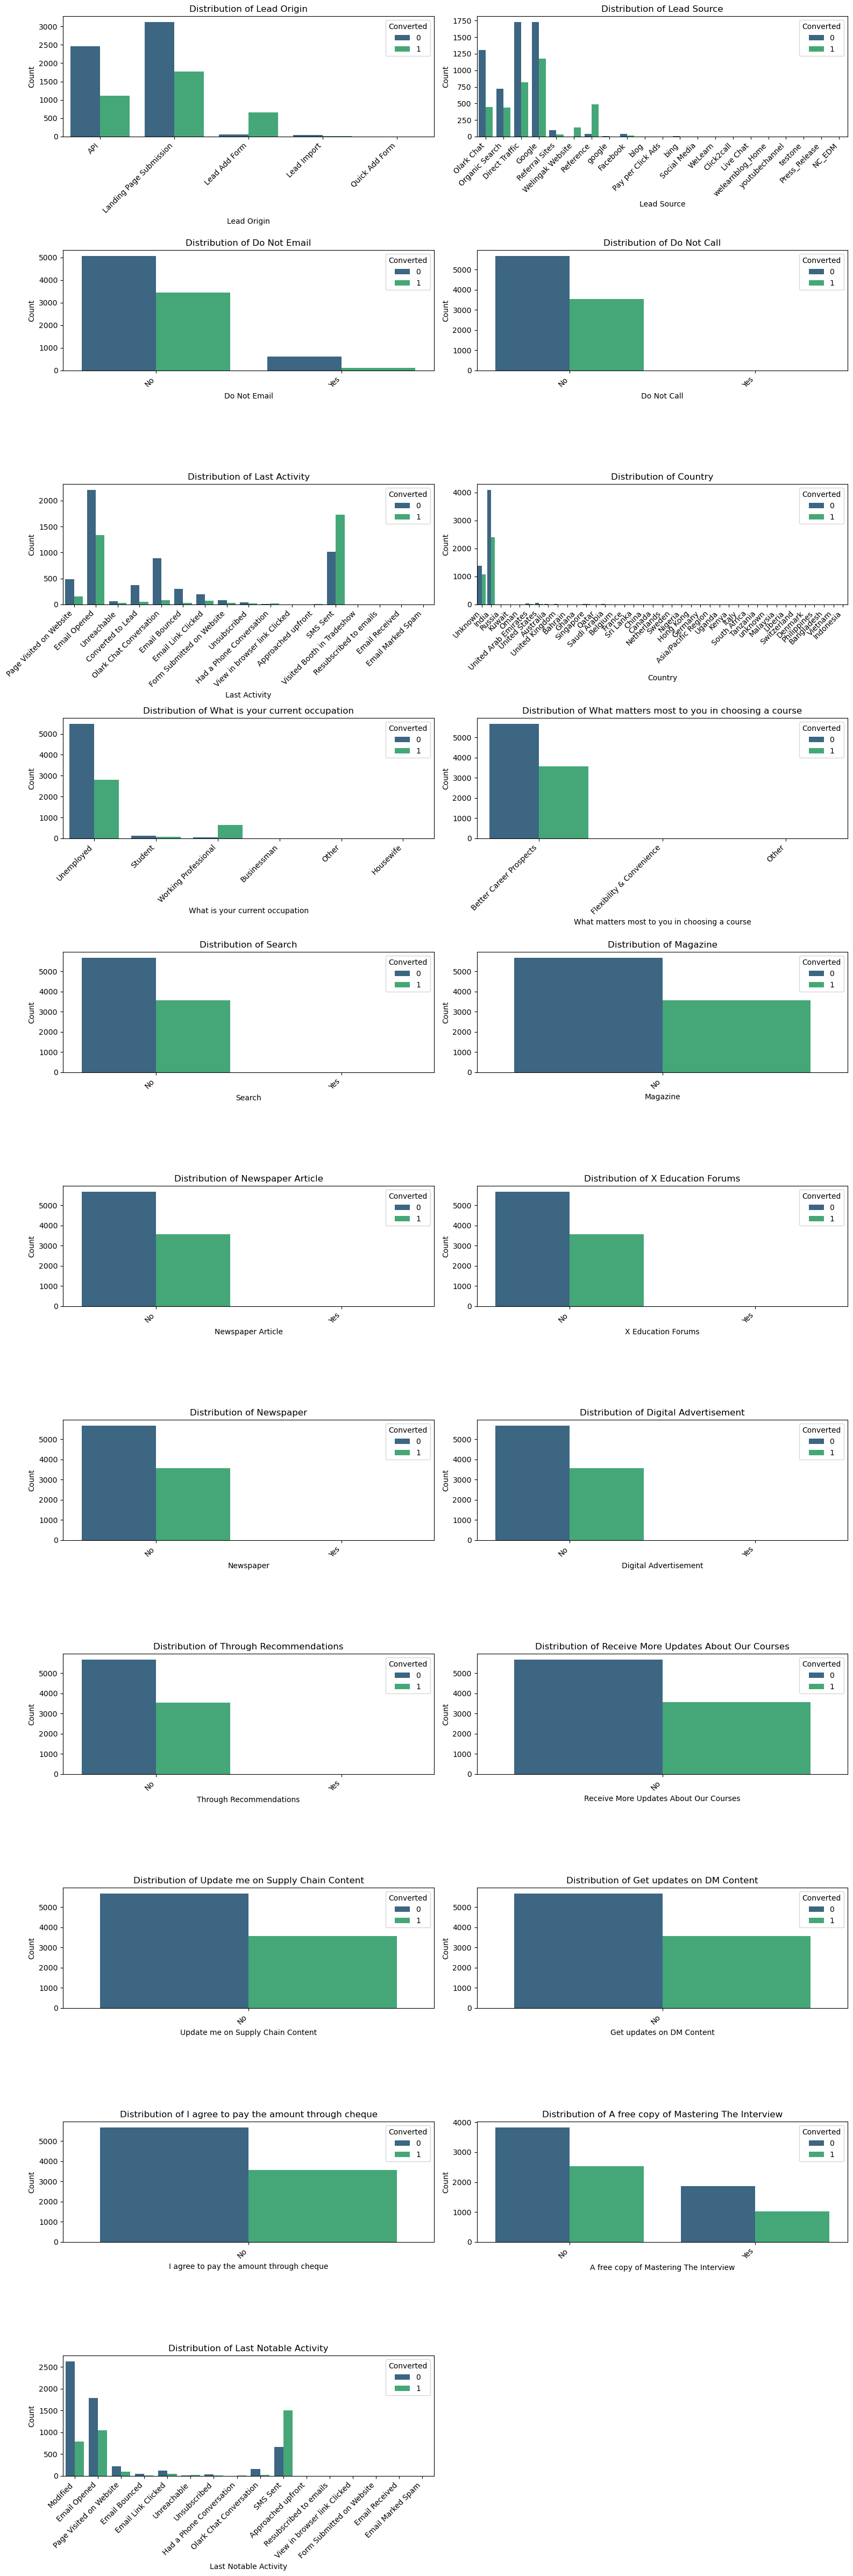

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(16, 48))  # Adjust the figure size based on your preferences

# Filter columns based on data type (considering object type as categorical)
categorical_columns = df.select_dtypes(include=['object']).columns

# Define the number of rows and columns for subplots
rows = len(categorical_columns) // 2 + len(categorical_columns) % 2
cols = 2

# Iterate through each categorical column and create subplots
for i, column in enumerate(categorical_columns):
    plt.subplot(rows, cols, i + 1)
    sns.countplot(x=df[column], hue=df['Converted'], palette='viridis')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')  # Adjust rotation for better readability

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()


# Step 3: Creating Dummy Variables 

In [20]:
categorical_columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Country', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

#### Dummification

In [21]:
# OneHot Encoding / Dummification 
df=pd.get_dummies(df,columns=categorical_columns, drop_first=True)

In [22]:
df.shape

(9240, 113)

In [23]:
# Converting Boolean Values to Numeric: True to 1, False to 0
df.replace({True:1,False:0},inplace=True)

In [24]:
# Displaying first 5 rows 
df.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


# Step 4: Checking outliers  

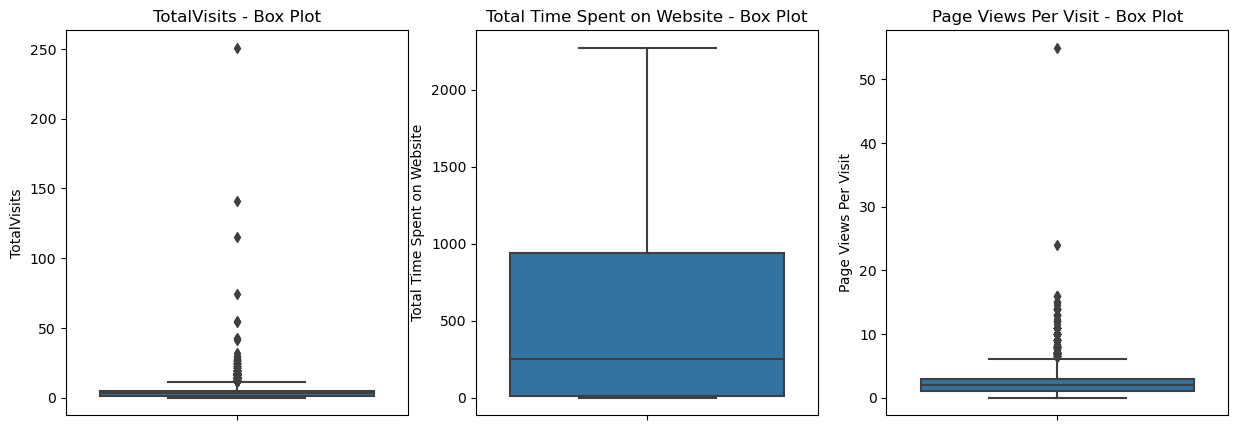

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(15, 5))

# Box plot for TotalVisits
plt.subplot(1, 3, 1)
sns.boxplot(y=df['TotalVisits'])
plt.title('TotalVisits - Box Plot')

# Box plot for Total Time Spent on Website
plt.subplot(1, 3, 2)
sns.boxplot(y=df['Total Time Spent on Website'])
plt.title('Total Time Spent on Website - Box Plot')

# Box plot for Page Views Per Visit
plt.subplot(1, 3, 3)
sns.boxplot(y=df['Page Views Per Visit'])
plt.title('Page Views Per Visit - Box Plot')

# Show the plots
plt.show()


# Step 5: Looking at Correlations

In [26]:

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Identify highly correlated pairs 
threshold = 0.8
highly_correlated_pairs = []

# Iterate through the upper triangle of the correlation matrix
for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            pair = (correlation_matrix.columns[i], correlation_matrix.columns[j])
            highly_correlated_pairs.append(pair)

# Display highly correlated pairs
print("Highly Correlated Dummy Variable Pairs:")
for pair in highly_correlated_pairs:
    print(pair)


Highly Correlated Dummy Variable Pairs:
('Lead Origin_Lead Add Form', 'Lead Source_Reference')
('Lead Origin_Lead Import', 'Lead Source_Facebook')
('Last Activity_Email Link Clicked', 'Last Notable Activity_Email Link Clicked')
('Last Activity_Email Marked Spam', 'Last Notable Activity_Email Marked Spam')
('Last Activity_Email Opened', 'Last Notable Activity_Email Opened')
('Last Activity_Resubscribed to emails', 'Last Notable Activity_Resubscribed to emails')
('Last Activity_SMS Sent', 'Last Notable Activity_SMS Sent')
('Last Activity_Unsubscribed', 'Last Notable Activity_Unsubscribed')
('Country_India', 'Country_Unknown')
('What is your current occupation_Unemployed', 'What is your current occupation_Working Professional')


In [27]:
# Drop one column from each highly correlated pair
for pair in highly_correlated_pairs:
    col_to_drop = pair[1]  # Choose the column to drop 
    df = df.drop(col_to_drop, axis=1)

In [28]:
df.shape

(9240, 103)

# Step 6: Test-Train Split

In [29]:
# Import the train_test_split function from scikit-learn
from sklearn.model_selection import train_test_split

In [30]:
# Putting feature variable to X
x=df.drop("Converted",axis=1)

In [31]:
x.shape

(9240, 102)

In [32]:
# Putting response variable to y
y=df.Converted

In [33]:
# Splitting the data into train and test
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=100)

# Step 7: Feature Scaling

In [34]:
# Import MinMax scaler
from sklearn.preprocessing import StandardScaler
# Scale the numeric features
scaler = StandardScaler()
cols=['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']


In [35]:
# Fit and transform the selected columns in the training set
x_train[cols] = scaler.fit_transform(x_train[cols])

# Transform the same selected columns in the testing set using the parameters from the training set
x_test[cols] = scaler.transform(x_test[cols])

In [36]:
# Displaying first 5 rows 
x_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Live Chat,...,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Unreachable,Last Notable Activity_View in browser link Clicked
1871,-0.657764,-0.885371,-1.088305,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6795,0.099483,0.005716,-0.473232,1,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
3516,0.288795,-0.691418,0.067847,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8105,0.288795,1.365219,1.223999,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3934,-0.657764,-0.885371,-1.088305,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [37]:
### Checking the Converted Rate
converted = (sum(df.Converted)/len(df.Converted.index))*100
converted

38.53896103896104

#####  We have almost 38.53% conversion rate


# Step 8 : Model Building

In [38]:
import statsmodels.api as sm

In [39]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(x_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6372
Model Family:                Binomial   Df Model:                           95
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2629.6
Date:                Sat, 13 Jan 2024   Deviance:                       5259.3
Time:                        17:38:07   Pearson chi2:                 7.31e+03
No. Iterations:                    24   Pseudo R-squ. (CS):             0.4032
Covariance Type:            nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                      28.1071   6.71e+04      0.000      1.000   -1.32e+05    1.32e+05
TotalVisits                                                                 0.1949      0.052      3.771      0.000       0.094       0.296
Total Time Spent on Website                                                 1.1001      0.041     27.143      0.000       1.021       1.180
Page Views Per Visit                                                       -0.1274      0.054     -2.354      0.019      -0.233      -0.021
Lead Origin_Landing Page Submission                                        -0.1670      0.107     -1.564      0.118      -0.376       0.042
Lead Origin_Lead Add Form                                                   2.7145      0.585      4.639      0.000       1.568       3.861
Lead Origin_Lead Import                                                    -0.9667      0.790     -1.224      0.221      -2.515       0.581
Lead Origin_Quick Add Form                                                 24.0922   1.04e+05      0.000      1.000   -2.03e+05    2.03e+05
Lead Source_Direct Traffic                                                 -0.6830      0.569     -1.200      0.230      -1.799       0.433
Lead Source_Google                                                         -0.3344      0.558     -0.599      0.549      -1.428       0.759
Lead Source_Live Chat                                                      22.9741   1.66e+05      0.000      1.000   -3.26e+05    3.26e+05
Lead Source_NC_EDM                                                         28.0958   9.08e+05   3.09e-05      1.000   -1.78e+06    1.78e+06
Lead Source_Olark Chat                                                      0.1651      0.611      0.270      0.787      -1.032       1.362
Lead Source_Organic Search                                                 -0.5301      0.572     -0.926      0.354      -1.652       0.592
Lead Source_Pay per Click Ads                                             -27.6990   1.33e+06  -2.08e-05      1.000    -2.6e+06     2.6e+06
Lead Source_Press_Release                                                 -24.4133   2.51e+05  -9.73e-05      1.000   -4.92e+05    4.92e+05
Lead Source_Referral Sites                                                 -0.5976      0.641     -0.932      0.351      -1.854       0.659
Lead Source_Social Media                                                    1.9295      1.568      1.231      0.218      -1.143       5.002
Lead Source_WeLearn                                                        23.3922   1.01e+05      0.000      1.000   -1.98e+05    1.98e+05
Lea

# Step 9: Feature Selection Using RFE

In [40]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [41]:
# Import RFE 
from sklearn.feature_selection import RFE
rfe=RFE(logreg,n_features_to_select=15)
rfe.fit(x_train,y_train)

RFE(estimator=LogisticRegression(), n_features_to_select=15)

In [42]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('TotalVisits', False, 62),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 65),
 ('Lead Origin_Landing Page Submission', False, 50),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 30),
 ('Lead Origin_Quick Add Form', False, 18),
 ('Lead Source_Direct Traffic', False, 27),
 ('Lead Source_Google', False, 31),
 ('Lead Source_Live Chat', False, 69),
 ('Lead Source_NC_EDM', False, 34),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 28),
 ('Lead Source_Pay per Click Ads', False, 56),
 ('Lead Source_Press_Release', False, 48),
 ('Lead Source_Referral Sites', False, 29),
 ('Lead Source_Social Media', False, 5),
 ('Lead Source_WeLearn', False, 40),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 64),
 ('Lead Source_blog', False, 35),
 ('Lead Source_google', False, 15),
 ('Lead Source_testone', False, 83),
 ('Lead Source_welearnblog_Home', False, 41),
 ('Lead Source_youtubechannel',

In [43]:
# Selecting Features Identified by Recursive Feature Elimination (RFE)
col= x_train.columns[rfe.support_]

In [44]:
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Do Not Email_Yes', 'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'Country_Qatar', 'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified', 'Last Notable Activity_Unreachable'],
      dtype='object')

# Step 10: Model Building Using Selected Features of RFE

In [45]:
# Building a Logistic Regression Model using Statsmodels

x_train_sm= sm.add_constant(x_train[col])
logreg2=sm.GLM(y_train,x_train_sm,family=sm.families.Binomial())
res=logreg2.fit()

In [46]:
## Summary of Logistic Regression Model Results
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2697.0
Date:                Sat, 13 Jan 2024   Deviance:                       5394.0
Time:                        17:38:14   Pearson chi2:                 7.15e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3907
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                              1.5418      0.182      8.450      0.000       1.184       1.899
Total Time Spent on Website                        1.0969      0.039     27.921      0.000       1.020       1.174
Lead Origin_Lead Add Form                          3.7217      0.189     19.641      0.000       3.350       4.093
Lead Source_Olark Chat                             1.1519      0.102     11.299      0.000       0.952       1.352
Lead Source_Welingak Website                       1.9163      0.742      2.582      0.010       0.462       3.371
Do Not Email_Yes                                  -1.2555      0.165     -7.625      0.000      -1.578      -0.933
Last Activity_Had a Phone Conversation             1.1316      0.949      1.192      0.233      -0.728       2.992
Last Activity_Olark Chat Conversation             -0.8928      0.170     -5.262      0.000      -1.225      -0.560
Last Activity_SMS Sent                             1.2423      0.073     16.903      0.000       1.098       1.386
Country_Qatar                                    -22.3569   1.45e+04     -0.002      0.999   -2.84e+04    2.84e+04
What is your current occupation_Other             -2.4941      0.812     -3.070      0.002      -4.086      -0.902
What is your current occupation_Student           -2.4054      0.294     -8.191      0.000      -2.981      -1.830
What is your current occupation_Unemployed        -2.7831      0.183    -15.240      0.000      -3.141      -2.425
Last Notable Activity_Had a Phone Conversation     2.3272      1.452      1.603      0.109      -0.518       5.172
Last Notable Activity_Modified                    -0.8836      0.080    -11.055      0.000      -1.040      -0.727
Last Notable Activity_Unreachable                  1.6216      0.518      3.129      0.002       0.606       2.637
==================================================================================================================
"""

### Checking VIF 

In [47]:
# Importing VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [48]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Feat`res'] = x_train_sm[col].columns
vif['VIF'] = [variance_inflation_factor(x_train_sm[col].values, i) for i in range(x_train_sm[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Feat`res,VIF
11,What is your current occupation_Unemployed,2.38
5,Last Activity_Had a Phone Conversation,2.02
12,Last Notable Activity_Had a Phone Conversation,2.01
13,Last Notable Activity_Modified,1.82
2,Lead Source_Olark Chat,1.72
6,Last Activity_Olark Chat Conversation,1.55
7,Last Activity_SMS Sent,1.47
1,Lead Origin_Lead Add Form,1.35
0,Total Time Spent on Website,1.22
3,Lead Source_Welingak Website,1.22


In [49]:
col = col.drop(["Country_Qatar","Last Activity_Had a Phone Conversation"], 1)

In [50]:
# Dropping Below 2 columns due to high P value 
x_train_sm.drop(["Country_Qatar","Last Activity_Had a Phone Conversation"],axis=1,inplace=True)


# Step 11: Model Building 
#### After dropping columns with High P values and VIF

In [51]:
# Building a Logistic Regression Model using Statsmodels

logreg3= sm.GLM(y_train,x_train_sm, family=sm.families.Binomial())
res= logreg3.fit()

In [52]:
# Summary of Logistic Regression Model Results
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2701.8
Date:                Sat, 13 Jan 2024   Deviance:                       5403.7
Time:                        17:38:15   Pearson chi2:                 6.91e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3898
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                              1.5461      0.182      8.482      0.000       1.189       1.903
Total Time Spent on Website                        1.0960      0.039     27.944      0.000       1.019       1.173
Lead Origin_Lead Add Form                          3.7283      0.189     19.680      0.000       3.357       4.100
Lead Source_Olark Chat                             1.1536      0.102     11.321      0.000       0.954       1.353
Lead Source_Welingak Website                       1.9099      0.742      2.573      0.010       0.455       3.364
Do Not Email_Yes                                  -1.2548      0.165     -7.620      0.000      -1.578      -0.932
Last Activity_Olark Chat Conversation             -0.8976      0.170     -5.292      0.000      -1.230      -0.565
Last Activity_SMS Sent                             1.2404      0.073     16.896      0.000       1.096       1.384
What is your current occupation_Other             -2.5013      0.812     -3.081      0.002      -4.093      -0.910
What is your current occupation_Student           -2.4123      0.293     -8.220      0.000      -2.987      -1.837
What is your current occupation_Unemployed        -2.7912      0.182    -15.301      0.000      -3.149      -2.434
Last Notable Activity_Had a Phone Conversation     3.4622      1.099      3.151      0.002       1.309       5.616
Last Notable Activity_Modified                    -0.8739      0.080    -10.964      0.000      -1.030      -0.718
Last Notable Activity_Unreachable                  1.6247      0.518      3.135      0.002       0.609       2.640
==================================================================================================================
"""

### Checking VIF Again

In [53]:
vif = pd.DataFrame()
vif['Feat`res'] = x_train_sm[col].columns
vif['VIF'] = [variance_inflation_factor(x_train_sm[col].values, i) for i in range(x_train_sm[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Feat`res,VIF
9,What is your current occupation_Unemployed,2.38
11,Last Notable Activity_Modified,1.81
2,Lead Source_Olark Chat,1.72
5,Last Activity_Olark Chat Conversation,1.55
6,Last Activity_SMS Sent,1.47
1,Lead Origin_Lead Add Form,1.35
3,Lead Source_Welingak Website,1.22
0,Total Time Spent on Website,1.21
4,Do Not Email_Yes,1.12
8,What is your current occupation_Student,1.03


In [54]:
# Final Features
x_train_sm.columns

Index(['const', 'Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Do Not Email_Yes', 'Last Activity_Olark Chat Conversation',
       'Last Activity_SMS Sent', 'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified', 'Last Notable Activity_Unreachable'],
      dtype='object')

In [55]:
# Predicting Probability of Conversion on Training Data
y_train_pred = res.predict(x_train_sm).values.reshape(-1)

##### Creating a dataframe with the actual converted and the predicted probabilities

In [56]:
y_train_pred_final= pd.DataFrame({"Converted":y_train.values,"Converted_Prob":y_train_pred})

In [57]:
## Displaying the First Few Rows of Predicted Probabilities on Training Data
y_train_pred_final.head()

,Converted,Converted_Prob
0,0,0.256951
1,0,0.224637
2,0,0.299579
3,0,0.816305
4,0,0.126115


##### Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

In [58]:
y_train_pred_final["Predicted"]=y_train_pred_final.Converted_Prob.map(lambda x : 1 if x>0.5 else 0)

In [59]:
y_train_pred_final.head()

,Converted,Converted_Prob,Predicted
0,0,0.256951,0
1,0,0.224637,0
2,0,0.299579,0
3,0,0.816305,1
4,0,0.126115,0


# Step 12: Metrics 
#### Accuracy

In [60]:
## Importing Metrics Module from scikit-learn
from sklearn import metrics

In [61]:
## Creating Confusion Matrix for Training Data Predictions
confusion= metrics.confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.Predicted)

In [62]:
## Calculating Accuracy Score on Training Data Predictions
print(metrics.accuracy_score(y_train_pred_final.Converted,y_train_pred_final.Predicted))

0.8147804576376005


## Metrics beyond simply accuracy

In [63]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [64]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6966747769667477

In [65]:
# Let us calculate specificity
TN / float(TN+FP)

0.8875562218890555

In [66]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.11244377811094453


In [67]:
# positive predictive value 
print (TP / float(TP+FP))

0.7924354243542435


In [68]:
# Negative predictive value
print (TN / float(TN+ FN))

0.826046511627907


# Step 13: Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [69]:
# Defining Fucntion for ROC curve

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [70]:
## Calculating ROC Curve Parameters on Training Data Predictions
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

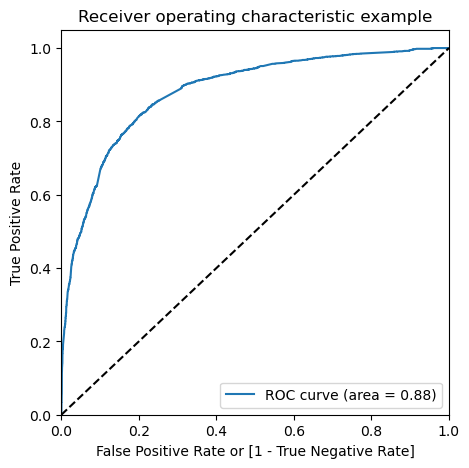

In [71]:
## Drawing ROC Curve for Training Data Predictions
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

# Step 14: Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [72]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.256951,0,1,1,1,0,0,0,0,0,0,0
1,0,0.224637,0,1,1,1,0,0,0,0,0,0,0
2,0,0.299579,0,1,1,1,0,0,0,0,0,0,0
3,0,0.816305,1,1,1,1,1,1,1,1,1,1,0
4,0,0.126115,0,1,1,0,0,0,0,0,0,0,0


In [73]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.581323  0.972830  0.340080
0.2   0.2  0.745207  0.912409  0.642179
0.3   0.3  0.798701  0.835361  0.776112
0.4   0.4  0.813234  0.758719  0.846827
0.5   0.5  0.814780  0.696675  0.887556
0.6   0.6  0.795609  0.591646  0.921289
0.7   0.7  0.780303  0.509732  0.947026
0.8   0.8  0.762678  0.424574  0.971014
0.9   0.9  0.714595  0.269667  0.988756


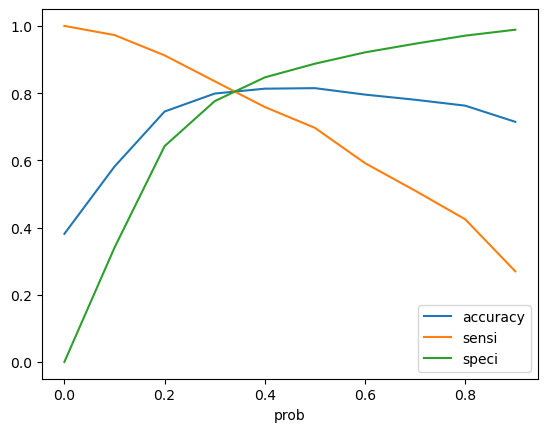

In [74]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

<font color= green>___From the curve above, 0.35 is the optimum point to take it as a cutoff probability.___</font>

In [75]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.35 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.256951,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.224637,0,1,1,1,0,0,0,0,0,0,0,0
2,0,0.299579,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.816305,1,1,1,1,1,1,1,1,1,1,0,1
4,0,0.126115,0,1,1,0,0,0,0,0,0,0,0,0


In [76]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8076685219542362

In [77]:
## Creating Confusion Matrix for Final Predictions on Training Data
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3272,  730],
       [ 514, 1952]], dtype=int64)

## Lead Conversion Scenarios: Prioritizing Sensitivity (Recall)

In lead conversion scenarios, the cost of missing a potential customer (false negatives) is often considered higher than incorrectly classifying a non-interested lead as a potential customer (false positives). The primary goal is to maximize the number of true positives while minimizing false negatives.

### Sensitivity (Recall)


- **Interpretation:** Sensitivity measures the proportion of actual positive instances (converted leads) correctly identified by the model.
- **Rationale:** Maximizing sensitivity ensures that a higher percentage of leads that could potentially convert are correctly identified, reducing the number of missed opportunities.

This metric is crucial in lead conversion scenarios as it emphasizes capturing as many potential customers as possible, contributing to the overall success of the conversion strategy.


In [78]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [79]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7915652879156528

In [80]:
# Let us calculate specificity
TN / float(TN+FP)

0.8175912043978011

In [81]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.18240879560219891


In [82]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7278150633855331


In [83]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8642366613840465


<font color= green>___With the current cut off as 0.35 we have accuracy, sensitivity and specificity of around 80%.___</font>

# Step 15: Precision and recall tradeoff

In [84]:
from sklearn.metrics import precision_recall_curve

In [85]:
## Calculating Precision-Recall Curve Parameters on Training Data Predictions
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

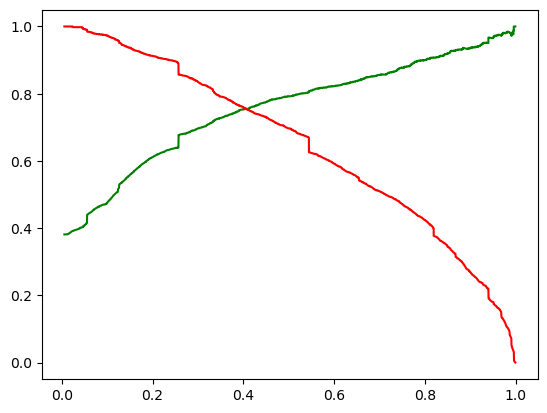

In [86]:
## Plotting Precision (in green) and Recall (in red) Against Thresholds
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [87]:
# Precision = TP / TP + FP
TP / float(TP + FP)

0.7278150633855331

In [88]:
#Recall = TP / TP + FN
TP / float(TP + FN)

0.7915652879156528

# Step 16: Making predictions on the test set

In [130]:
## Selecting Features for Testing Data Based on Training Feature Selection
x_test = x_test[col]
x_test.head()

,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Unreachable
4269,0.964504,0,0,0,0,0,1,0,0,1,0,0,0
2376,-0.885371,1,0,0,0,0,1,0,0,1,0,0,0
7766,-0.777416,0,0,0,0,0,0,0,0,0,0,0,1
9199,-0.885371,0,1,0,0,1,0,0,0,1,0,1,0
4359,-0.885371,1,0,0,0,0,0,0,0,1,0,0,0


In [131]:
## Adding Constant Term to Testing Data for Logistic Regression
x_test_sm = sm.add_constant(x_test)

### Making predictions on the test set

In [132]:
## Predicting Probability of Conversion on Testing Data
y_test_pred = res.predict(x_test_sm)

In [133]:
# Converting y_pred to a dataframe which is an array
y_pred_1= pd.DataFrame(y_test_pred)

In [138]:
# Let's see the head
y_pred_1.head()


,0
4269,0.741222
2376,0.940091
7766,0.910415
9199,0.055546
4359,0.819475


In [139]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [140]:
# Let's see the head
y_test_df.head()

,Converted
4269,1
2376,1
7766,1
9199,0
4359,1


In [141]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [142]:
## Displaying the First Few Rows of Final Predictions on Testing Data
y_pred_final.head()

,Converted,0
4269,1,0.741222
2376,1,0.940091
7766,1,0.910415
9199,0,0.055546
4359,1,0.819475


In [143]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Probablity'})

In [144]:
y_pred_final.columns

Index(['Converted', 'Converted_Probablity'], dtype='object')

In [145]:
## Creating Final Predictions based on Probability Threshold (0.4) for Testing Data
y_pred_final['final_predicted'] = y_pred_final.Converted_Probablity.map(lambda x: 1 if x > 0.4 else 0)

In [146]:
## Displaying the First Few Rows of Final Predictions on Testing Data
y_pred_final.head()

,Converted,Converted_Probablity,final_predicted
4269,1,0.741222,1
2376,1,0.940091,1
7766,1,0.910415,1
9199,0,0.055546,0
4359,1,0.819475,1


In [147]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8181818181818182

In [148]:
## Creating Confusion Matrix for Final Predictions on Testing Data
confusion3 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion3

array([[1433,  244],
       [ 260,  835]], dtype=int64)

In [149]:
TP = confusion3[1,1] # true positive 
TN = confusion3[0,0] # true negatives
FP = confusion3[0,1] # false positives
FN = confusion3[1,0] # false negatives

In [150]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7625570776255708

In [151]:
# Let us calculate specificity
TN / float(TN+FP)

0.8545020870602266

In [154]:
## Converting Columns of x_test_sm to a DataFrame
Columns=x_test_sm.columns.to_frame()

In [155]:
## Resetting Index of Columns DataFrame and Dropping the Extra Column
Columns.reset_index()
Columns.drop(0,axis=1)


""
const
Total Time Spent on Website
Lead Origin_Lead Add Form
Lead Source_Olark Chat
Lead Source_Welingak Website
Do Not Email_Yes
Last Activity_Olark Chat Conversation
Last Activity_SMS Sent
What is your current occupation_Other
What is your current occupation_Student


## Conclusion: Feature Selection

In the analysis, the following features were selected  based on their importance in the lead conversion module:

1. **Total Time Spent on Website**
2. **Lead Origin_Lead Add Form**
3. **Lead Source_Olark Chat**
4. **Lead Source_Welingak Website**
5. **Do Not Email_Yes**
6. **Last Activity_Olark Chat Conversation**
7. **Last Activity_SMS Sent**
8. **What is your current occupation_Other**
9. **What is your current occupation_Student**
10. **What is your current occupation_Unemployed**
11. **Last Notable Activity_Had a Phone Conversation**
12. **Last Notable Activity_Modified**
13. **Last Notable Activity_Unreachable**

These features have been identified as crucial for the lead conversion module based on the analysis conducted. The Feature's provides a clear understanding of the relative importance of each feature in contributing to the successful conversion of leads into paying customers.

It's important to note that the feature selection process considered various factors, such as predictive power, correlation with the target variable, and business relevance. The chosen features are expected to significantly impact the model's ability to identify and prioritize potential leads with a higher likelihood of conversion.

The next steps involve incorporating these selected features into the lead conversion model and evaluating its performance. Continuous monitoring and refinement of the model may be necessary to adapt to changing business conditions and ensure optimal lead conversion outcomes. Additionally, further analysis can be conducted to explore interactions between these features and uncover additional insights that contribute to the overall success of the lead conversion strategy.
